# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Als je water verwarmt, moet je energie toevoegen. Hoeveel energie daarvoor nodig is, hangt af van de soortelijke warmte van water.

Water heeft een hoge soortelijke warmte, wat betekent dat je veel energie nodig hebt om het een beetje warmer te maken. Daarom warmt water langzaam op en koelt het ook langzaam af.

De relatie tussen energie en temperatuurstijging is:
\(\Delta\)






 

Door te meten:

hoeveel water je hebt

hoeveel energie je toevoegt

hoeveel graden het water warmer wordt

kun je de soortelijke warmte 
𝑐
 van water uitrekenen. 

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.

Procedure:

Je vult een maatbeker met een heoveelheid water, bijvoorbeeld 300ml. je bepaalt de massa van het water.
daarna zet je het water op een magnetische mixer. Je doet een elektrisch verwarmingselement erin en start de timer. Op het scherm van het apparaat waarmee het verwarmingselement is verbonden zie je hoeveel spanning en stroom erin gaat. Hieruit kan je het vermogen halen door P = U*I. Als je tot een zekere temperatuur komt, dan stop je de timer. Je kan de hoeveelheid energie dan berekenen door $E = P*t$ waarbij je P hebt berekend en t heb je bepaald door middel van je stopwatch.
je hebt de formule $c=E/(m*\Delta T)$. $\Delta T$ is het temperatuursverschil voor en na het verwarmen van het water en m is de massa van het water dat je hebt bepaald voor het verwarmen van het water. Hieruit kan je de c bepalen en dat is de soorteloijke warmte van water. 
```


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten


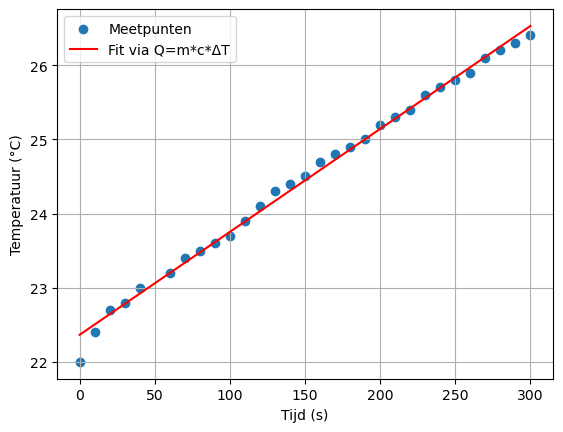

Begin temperatuur T0 = 22.37 °C
Soortelijke warmte c van het water = 4164 ± 59 J/(kg·K)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Meetdata
temperatuur = np.array([
    22, 22.4, 22.7, 22.8, 23.0, 23.2, 23.4, 23.5, 23.6, 23.7,
    23.9, 24.1, 24.3, 24.4, 24.5, 24.7, 24.8, 24.9, 25.0,
    25.2, 25.3, 25.4, 25.6, 25.7, 25.8, 25.9, 26.1, 26.2,
    26.3, 26.4
])
tijd = np.array([
    0, 10, 20, 30, 40, 60, 70, 80, 90, 100, 110, 120, 130,
    140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240,
    250, 260, 270, 280, 290, 300
])

# Gegeven vermogen en massa
P = 17*1.7  #P
m = 0.50  #kg

# Model gebaseerd op Q = m*c*ΔT
def T_model_Q(t, T0, c):
    return T0 + (P / (m * c)) * t

# Beginwaarden: T0 = eerste meetpunt, c_water ≈ 4180 J/kgK bij een druk van 1 atm
p0 = [temperatuur[0], 4180]

# Curvefit aanroepen
params, cov = curve_fit(T_model_Q, tijd, temperatuur, p0=p0)
T0_fit, c_fit = params
c_err = np.sqrt(cov[1, 1])

# Plot
t_fit = np.linspace(0, 300, 400)
plt.figure()
plt.scatter(tijd, temperatuur, label="Meetpunten")
plt.plot(t_fit, T_model_Q(t_fit, *params), label="Fit via Q=m*c*ΔT", color='red')
plt.xlabel("Tijd (s)")
plt.ylabel("Temperatuur (°C)")
plt.legend()
plt.grid()
plt.show()

# Resultaten
print(f"Begin temperatuur T0 = {T0_fit:.2f} °C")
print(f"Soortelijke warmte c van het water = {c_fit:.0f} ± {c_err:.0f} J/(kg·K)")



# Discussie en conclusie
Ik krijg uiteindelijk een soortelijke warmte van $4164 +/- 59 J/(Kg*K)$, dit komt goed overeen met de werkelijke waarde van de soortelijke warmte van water, namelijk $4186 J/(Kg*K)$

Deze proef vond ik zelf heel goed gaan, alleen dat ik soms een heel klein beetje te laat was met de tijd checken, waardoor de waarde van de soortelijke warmte een beetje kan afwijken.
